In [45]:
import matplotlib.pyplot as plt
import numpy as np
import h5py
from scipy.signal import periodogram

# open data

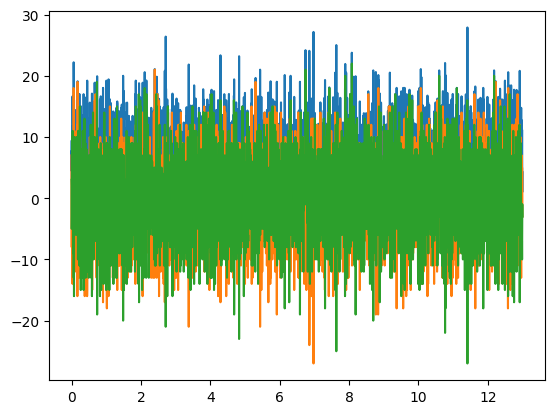

In [151]:
filepath = r"G:\My Drive\chatot\data\time_of_flight\2025_05_26\05;19;17" + r"\data.h5"
data = h5py.File(filepath)
I = np.array(data['I'])
Q = np.array(data['Q'])
time = np.array(data['time'])
mag = np.abs(I + 1j*Q)

plt.plot(time, mag)
plt.plot(time, I)
plt.plot(time, Q)

# plot PSD of portion of trace containing signal

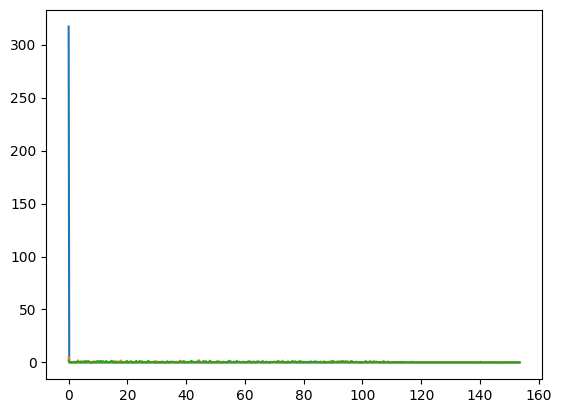

In [152]:
signal_start = 150
signal_end = 1685
fs = 1/np.mean(np.diff(time))

f_signal, I_psd_signal = periodogram(I[signal_start:signal_end], fs, detrend=None)
f_signal, Q_psd_signal = periodogram(Q[signal_start:signal_end], fs, detrend=None)
f_signal, mag_psd_signal = periodogram(mag[signal_start:signal_end], fs, detrend=None)

plt.plot(f_signal, mag_psd_signal)
plt.plot(f_signal, I_psd_signal)
plt.plot(f_signal, Q_psd_signal)

# plot PSD of portion of trace containing noise

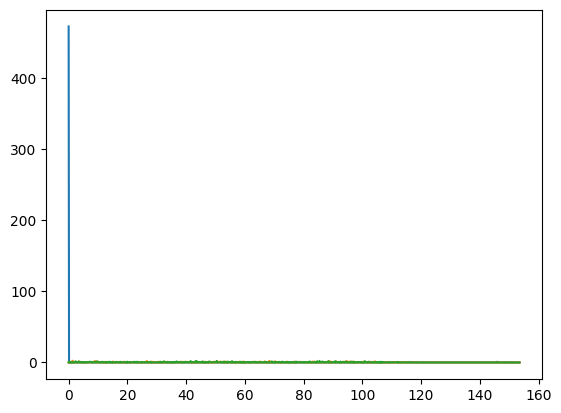

In [153]:
f_noise, I_psd_noise = periodogram(I[signal_end:], fs, detrend=None)
f_noise, Q_psd_noise = periodogram(Q[signal_end:], fs, detrend=None)
f_noise, mag_psd_noise = periodogram(mag[signal_end:], fs, detrend=None)

plt.plot(f_noise, mag_psd_noise)
plt.plot(f_noise, I_psd_noise)
plt.plot(f_noise, Q_psd_noise)

# calculate signal power, noise power, SNR

In [155]:
df = np.average(np.diff(f))

I_signal = I_psd_signal[0] * df
Q_signal = Q_psd_signal[0] * df
mag_signal = mag_psd_signal[0] * df

I_noise = np.trapezoid(I_psd_noise, f_noise)
Q_noise = np.trapezoid(Q_psd_noise, f_noise)
mag_noise = np.trapezoid(mag_psd_noise, f_noise)

I_SNR = I_signal / I_noise
Q_SNR = Q_signal / Q_noise
mag_SNR = mag_signal / mag_noise

print(I_SNR)
print(Q_SNR)
print(mag_SNR)

0.025942755901331643
0.009758727057006108
1.2833237351868223
